In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [ ]:
# Data Collection
data = pd.read_csv('/content/Robo.csv')
X = data.drop('V1', axis=1)
y = data['V1']

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


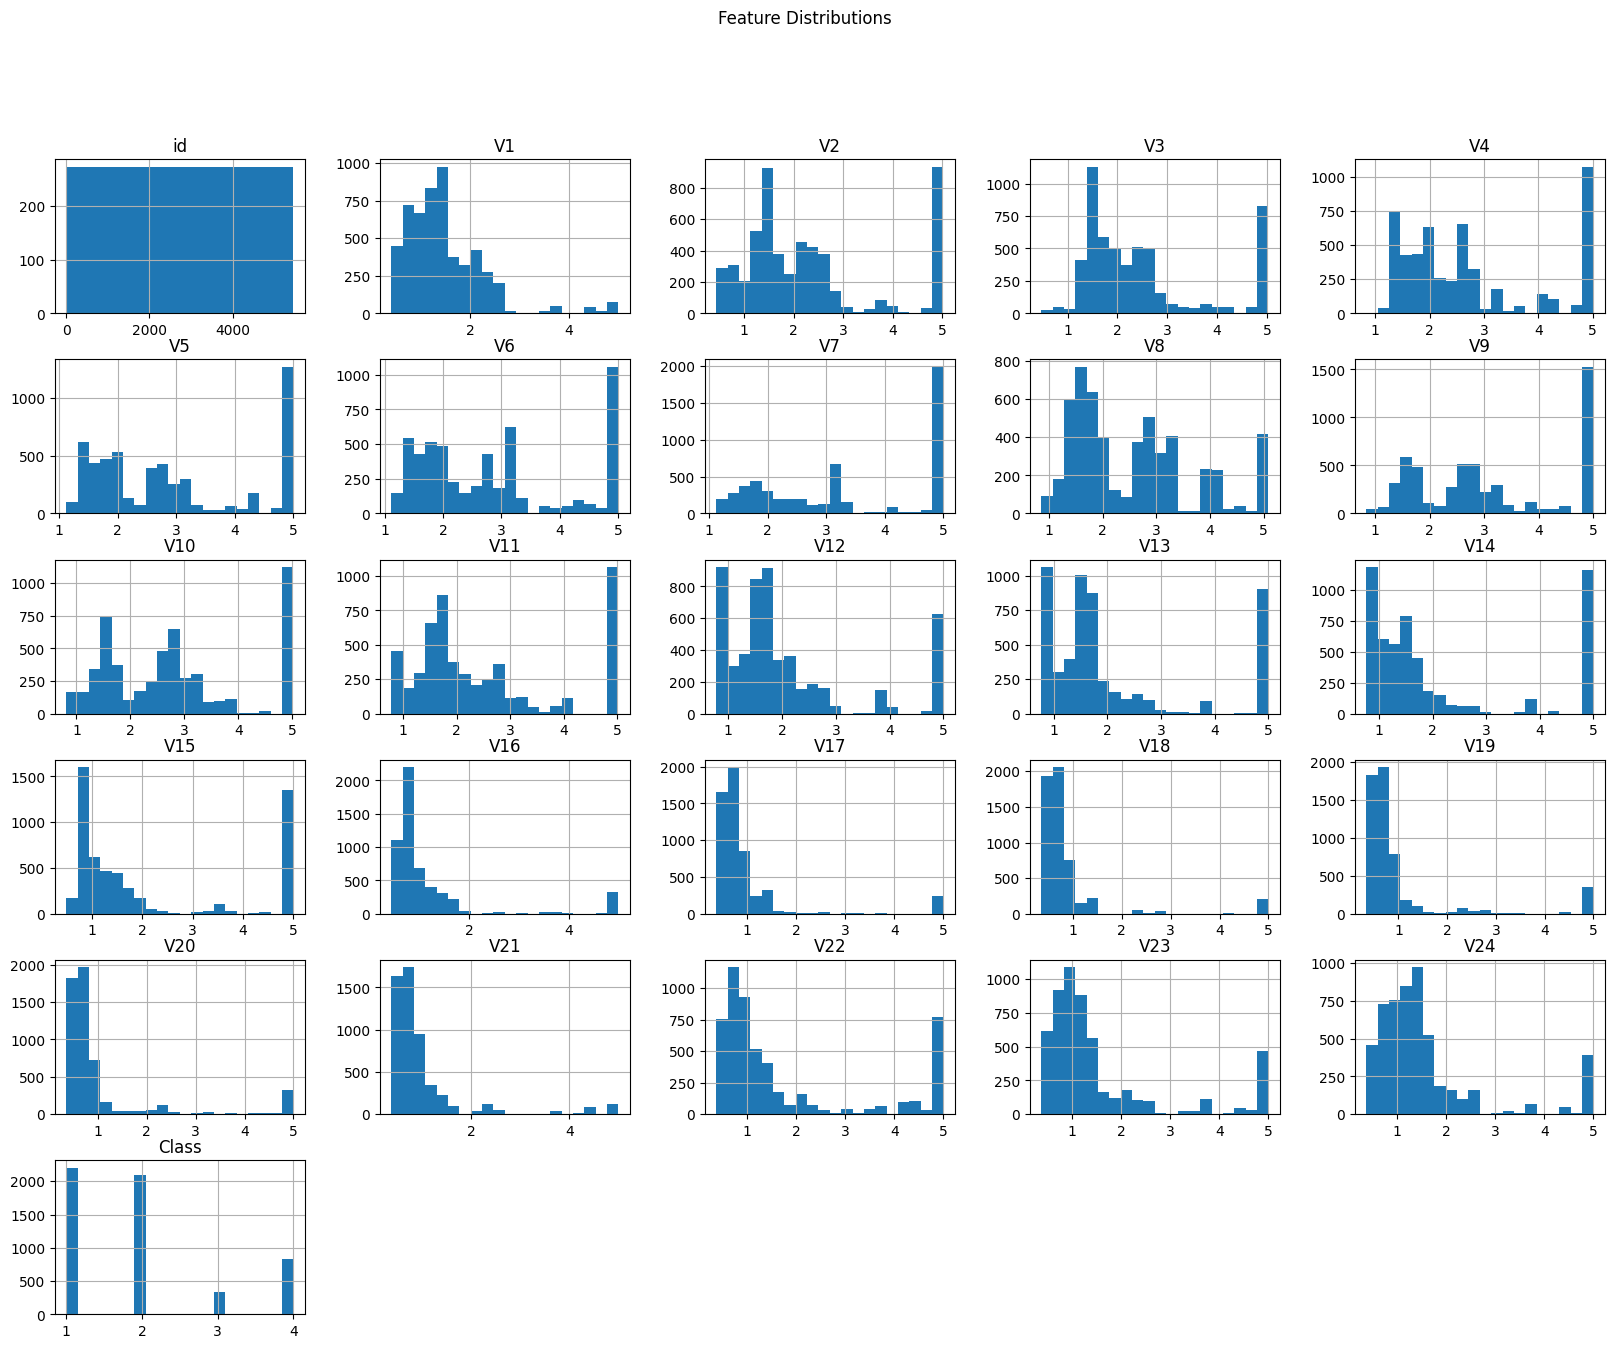

In [ ]:
#visualising:
# Plotting histograms for each feature
data.hist(figsize=(20, 15), bins=20)
plt.suptitle('Feature Distributions')
plt.show()


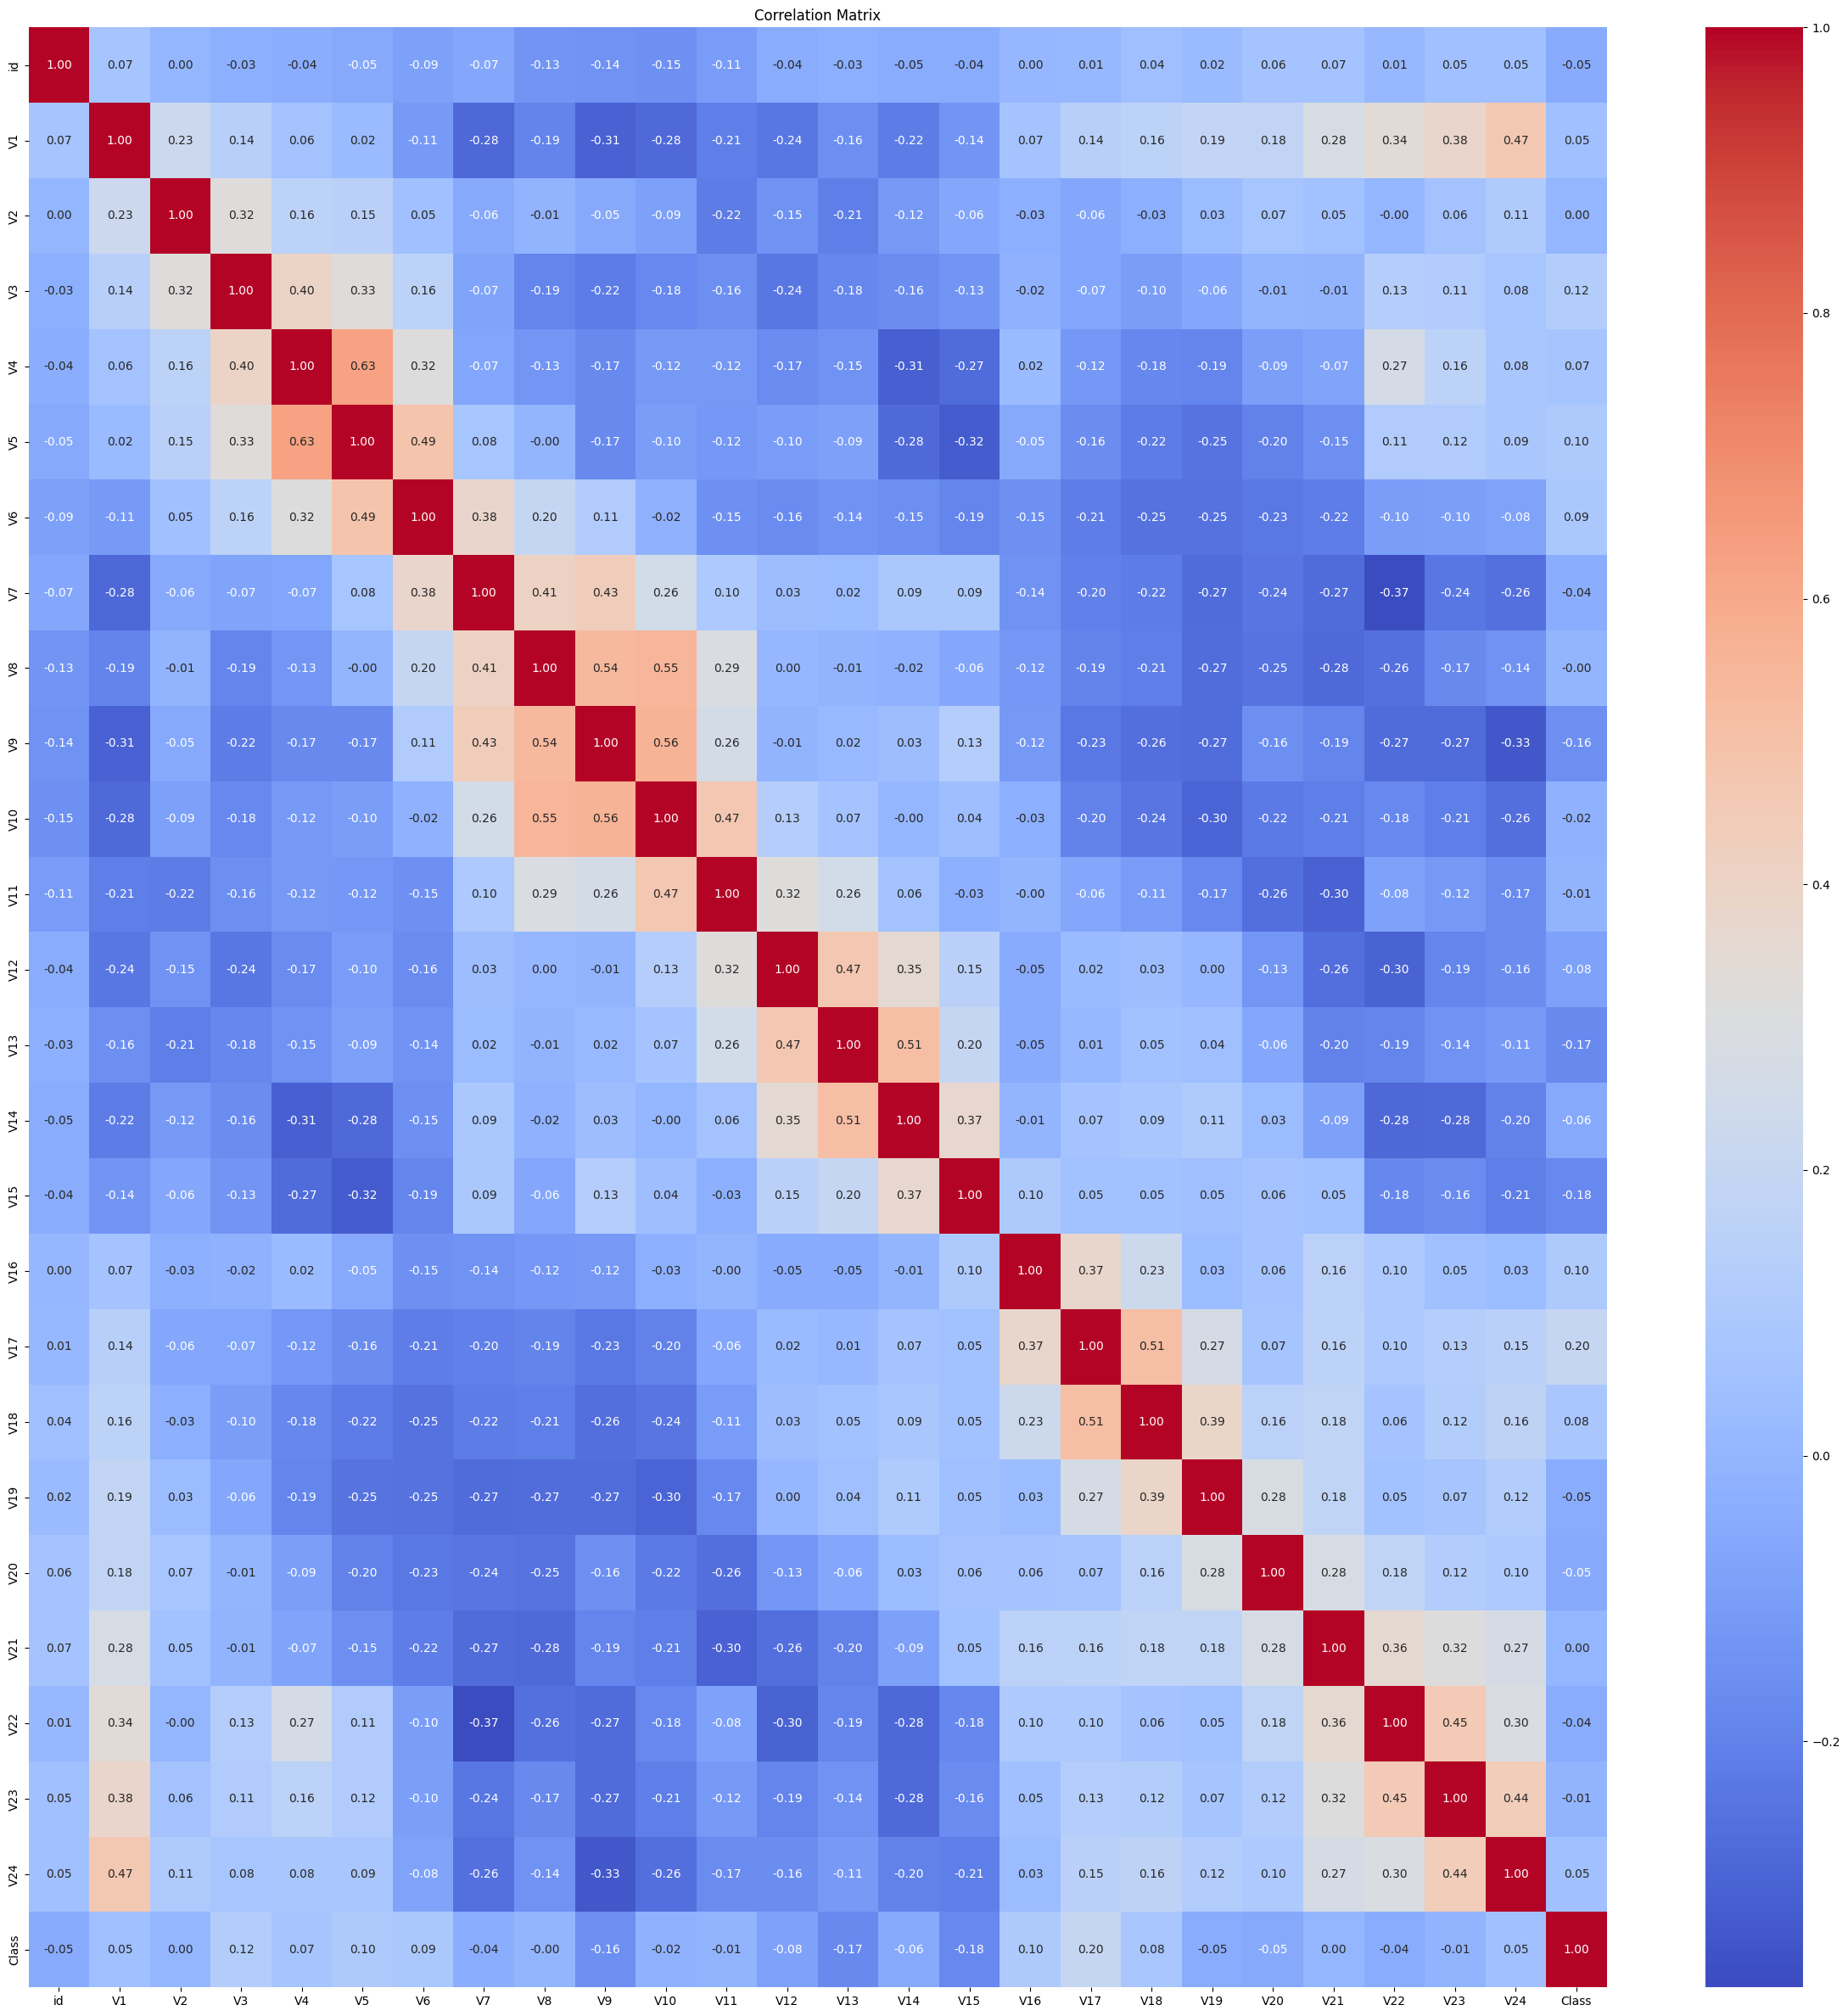

In [ ]:
#correlation matrix heat map :
# Assuming X is your feature set
import seaborn as sns
corr_matrix = data.corr()  # If 'data' includes your target variable, this will show correlations with it as well
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


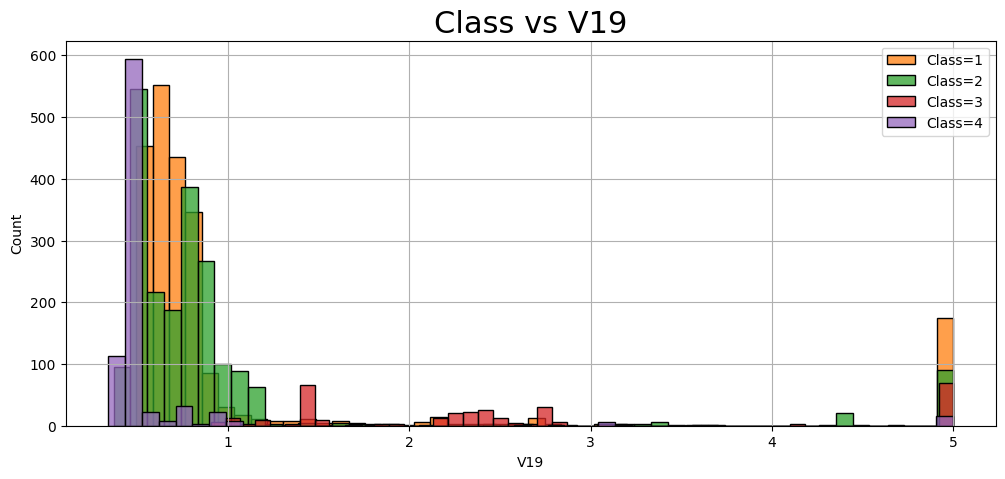

In [ ]:
fig, ax = plt.subplots(figsize=(12,5))
sns.histplot(data['V19'][data['Class']==1], label='Class=1', ax=ax, color='C1',bins=50)
sns.histplot(data['V19'][data['Class']==2], label='Class=2', ax=ax, color='C2',bins=50)
sns.histplot(data['V19'][data['Class']==3], label='Class=3', ax=ax, color='C3',bins=50)
sns.histplot(data['V19'][data['Class']==4], label='Class=4', ax=ax, color='C4',bins=50)
ax.set_title("Class vs V19",fontsize=22)
ax.legend()
ax.grid()
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import tensorflow as tf
from tensorflow import keras
models = []
model_names = []
accuracies = []
mses = []

log_reg = LogisticRegression()
models.append(log_reg)
model_names.append('Logistic Regression')

knn = KNeighborsClassifier()
models.append(knn)
model_names.append('K-Nearest Neighbors')

svm = SVC()
models.append(svm)
model_names.append('Support Vector Machine')

nn_model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=[len(X_train[0])]),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(len(encoder.classes_), activation='softmax')
])
nn_model.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
models.append(nn_model)
model_names.append('Neural Network')


In [ ]:
#Now as i have created the 3 models , lets train and then evaluate them.

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=8000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.4f}')



Logistic Regression Accuracy: 0.0339


In [ ]:
#K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors'

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.4f}')


KNN Accuracy: 0.0256


In [ ]:
# Support Vector Machine (SVM)
from sklearn.svm import SVC

# Initialize the SVM model
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.4f}')


SVM Accuracy: 0.0375


In [ ]:
log_reg = LogisticRegression(max_iter=8000)  # Increase max_iter


In [ ]:
log_reg = LogisticRegression(solver='saga', max_iter=8000)


In [ ]:
log_reg = LogisticRegression(C=0.1, max_iter=8000)


In [ ]:
import numpy as np
for model, name in zip(models, model_names):
    if name == 'Neural Network':
        model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
        y_pred = model.predict(X_test)
        y_pred_labels = [np.argmax(prediction) for prediction in y_pred]  # Directly use argmax results
        accuracy = accuracy_score(y_test, y_pred_labels)  # Compare encoded labels directly
        accuracies.append(accuracy)
        print(f"{name} Accuracy: {accuracy}")
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
        print(f"{name} Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.03388278388278388
K-Nearest Neighbors Accuracy: 0.02564102564102564
Support Vector Machine Accuracy: 0.037545787545787544
Epoch 1/10
137/137 [==============================] - 2s 8ms/step - loss: 7.5504 - accuracy: 0.0073 - val_loss: 7.4458 - val_accuracy: 0.0156
Epoch 2/10
137/137 [==============================] - 1s 6ms/step - loss: 6.7827 - accuracy: 0.0140 - val_loss: 7.5996 - val_accuracy: 0.0192
Epoch 3/10
137/137 [==============================] - 1s 6ms/step - loss: 6.0706 - accuracy: 0.0261 - val_loss: 8.0774 - val_accuracy: 0.0311
Epoch 4/10
137/137 [==============================] - 1s 5ms/step - loss: 5.4743 - accuracy: 0.0417 - val_loss: 8.6206 - val_accuracy: 0.0275
Epoch 5/10
137/137 [==============================] - 1s 6ms/step - loss: 4.9619 - accuracy: 0.0662 - val_loss: 9.3327 - val_accuracy: 0.0266
Epoch 6/10
137/137 [==============================] - 1s 5ms/step - loss: 4.5457 - accuracy: 0.0910 - val_loss: 9.9404 - val_accuracy: 0

In [ ]:
plt.figure(figsize=(15, 10))
if len(accuracies) > 0:
    plt.subplot(1, 2, 1)
    plt.bar(model_names, accuracies)
    plt.title('Model Accuracy')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
if len(mses) > 0:
    plt.subplot(1, 2, 2)
    plt.bar(model_names[:len(mses)], mses)
    plt.title('Model Mean Squared Error')
    plt.xlabel('Model')
    plt.ylabel('Mean Squared Error')
plt.tight_layout()
plt.show()


<Figure size 1500x1000 with 0 Axes>

In [ ]:
#training the neural network
history = nn_model.fit(
    X_train, y_train,
    epochs=50,  # Adjust based on the convergence of your model
    batch_size=32,  # Can be adjusted
    validation_data=(X_test, y_test),
    verbose=1  # Prints the training progress
)


Epoch 1/50
137/137 [==============================] - 2s 7ms/step - loss: 7.5629 - accuracy: 0.0089 - val_loss: 7.4708 - val_accuracy: 0.0156
Epoch 2/50
137/137 [==============================] - 1s 6ms/step - loss: 6.8523 - accuracy: 0.0137 - val_loss: 7.6367 - val_accuracy: 0.0201
Epoch 3/50
137/137 [==============================] - 1s 5ms/step - loss: 6.1677 - accuracy: 0.0222 - val_loss: 8.0457 - val_accuracy: 0.0229
Epoch 4/50
137/137 [==============================] - 1s 6ms/step - loss: 5.5583 - accuracy: 0.0401 - val_loss: 8.6181 - val_accuracy: 0.0220
Epoch 5/50
137/137 [==============================] - 1s 5ms/step - loss: 5.0151 - accuracy: 0.0644 - val_loss: 9.2919 - val_accuracy: 0.0201
Epoch 6/50
137/137 [==============================] - 1s 6ms/step - loss: 4.5696 - accuracy: 0.0937 - val_loss: 10.0334 - val_accuracy: 0.0330
Epoch 7/50
137/137 [==============================] - 1s 5ms/step - loss: 4.2214 - accuracy: 0.1228 - val_loss: 10.7552 - val_accuracy: 0.0275
Epoc

In [ ]:
#Evaluating the N_N model
test_loss, test_accuracy = nn_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy}")


35/35 [==============================] - 0s 7ms/step - loss: 25.6444 - accuracy: 0.0293
Test Accuracy: 0.029304029420018196


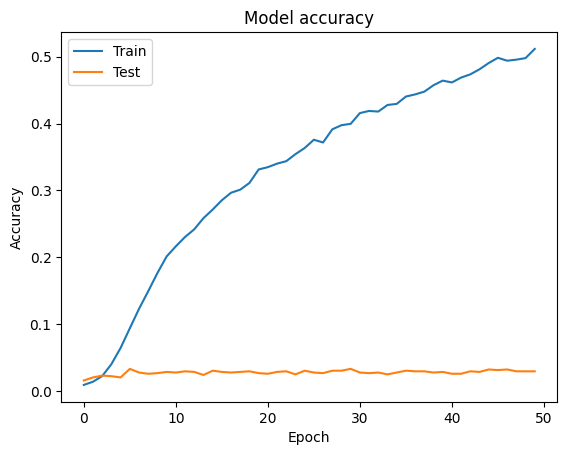

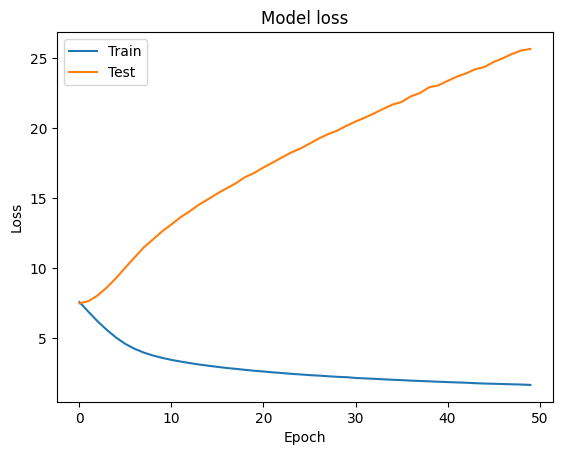

In [ ]:
#analysing the training process :
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
